In [62]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [63]:
data = pd.read_csv('full_data.csv', sep=',', engine='python')

In [64]:
type(data)

pandas.core.frame.DataFrame

In [65]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [66]:
print(data.shape)
print(data.columns)

(4981, 11)
Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [67]:
data[['age', 'avg_glucose_level', 'bmi']].describe()

,age,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173
std,22.662755,45.075373,6.790464
min,0.080000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


Посмотрим распределение данных по факту курения

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

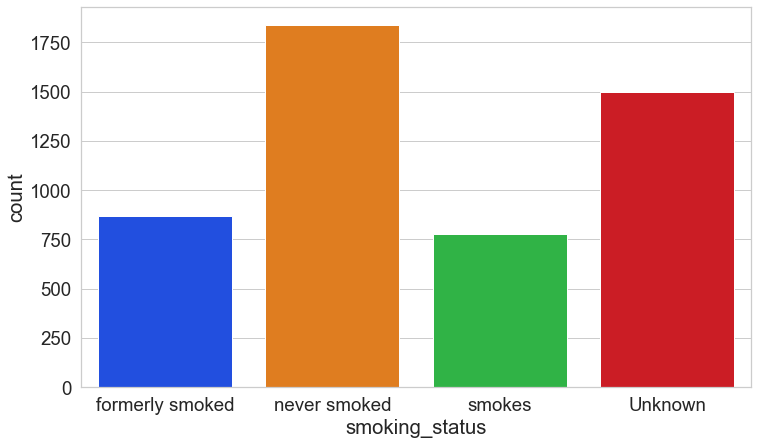

In [68]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x='smoking_status', palette='bright')

Теперь посмотрим распределение людей по месту проживания

<AxesSubplot:xlabel='Residence_type', ylabel='count'>

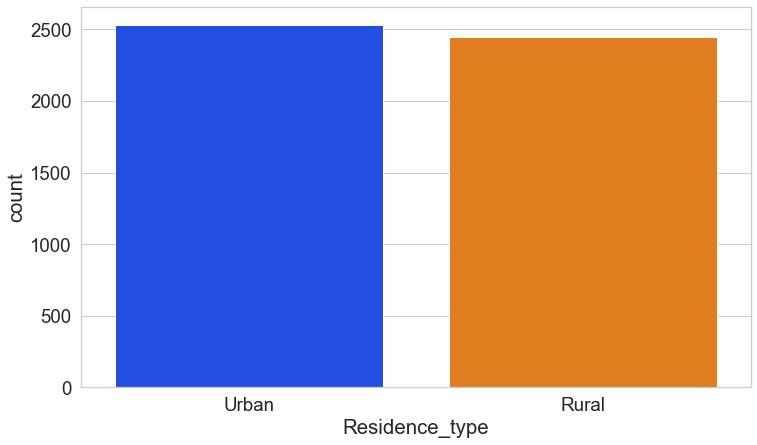

In [69]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x='Residence_type', palette='bright')

In [70]:
data = data[data['age'] >= 35] # укираем данные, где возраст меньше 35 лет

In [71]:
data_tmp = data[data['age'] < 55] # посмотрим данные людей до 55 лет

<AxesSubplot:xlabel='stroke', ylabel='count'>

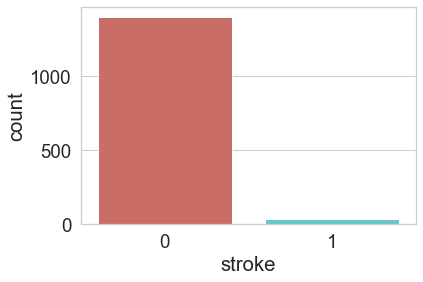

In [72]:
sns.countplot(x='stroke', data=data_tmp, palette='hls') # видно, что можно смела убирать данные людей и до 55 лет

In [73]:
data = data[data['age'] >= 55] # укираем данные, где возраст меньше 55 лет

# Готовим данные

In [74]:
data = data.astype({'age': np.int32})

In [75]:
data.at[data['gender'] == 'Male', 'gender'] = 0
data.at[data['gender'] == 'Female', 'gender'] = 1

In [76]:
data.at[data['ever_married'] == 'Yes', 'ever_married'] = 1
data.at[data['ever_married'] == 'No', 'ever_married'] = 0

In [77]:
data.at[data['Residence_type'] == 'Urban', 'Residence_type'] = 1
data.at[data['Residence_type'] == 'Rural', 'Residence_type'] = 0

In [78]:
data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'Unknown', 'smokes'],
      dtype=object)

In [79]:
data.at[data['smoking_status'] == 'formerly smoked', 'smoking_status'] = 1
data.at[data['smoking_status'] == 'never smoked', 'smoking_status'] = 2
data.at[data['smoking_status'] == 'smokes', 'smoking_status'] = 3
data.at[data['smoking_status'] == 'Unknown', 'smoking_status'] = 0

In [80]:
data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job'], dtype=object)

In [81]:
data.at[data['work_type'] == 'Private', 'work_type'] = 1
data.at[data['work_type'] == 'Self-employed', 'work_type'] = 2
data.at[data['work_type'] == 'Govt_job', 'work_type'] = 3

In [82]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67,0,1,1,1,1,228.69,36.6,1,1
1,0,80,0,1,1,1,0,105.92,32.5,2,1
3,1,79,1,0,1,2,0,174.12,24.0,2,1
4,0,81,0,0,1,1,1,186.21,29.0,1,1
5,0,74,1,1,1,1,0,70.09,27.4,2,1
...,...,...,...,...,...,...,...,...,...,...,...
4969,1,70,0,1,1,2,0,65.68,28.6,0,0
4970,1,70,0,1,1,2,1,240.69,30.9,3,0
4972,0,72,0,1,1,1,0,238.27,30.7,3,0
4974,0,58,0,0,1,3,1,84.94,30.2,2,0


Так как теперь все данные числовые, мы можем построить корреляционную матрицу

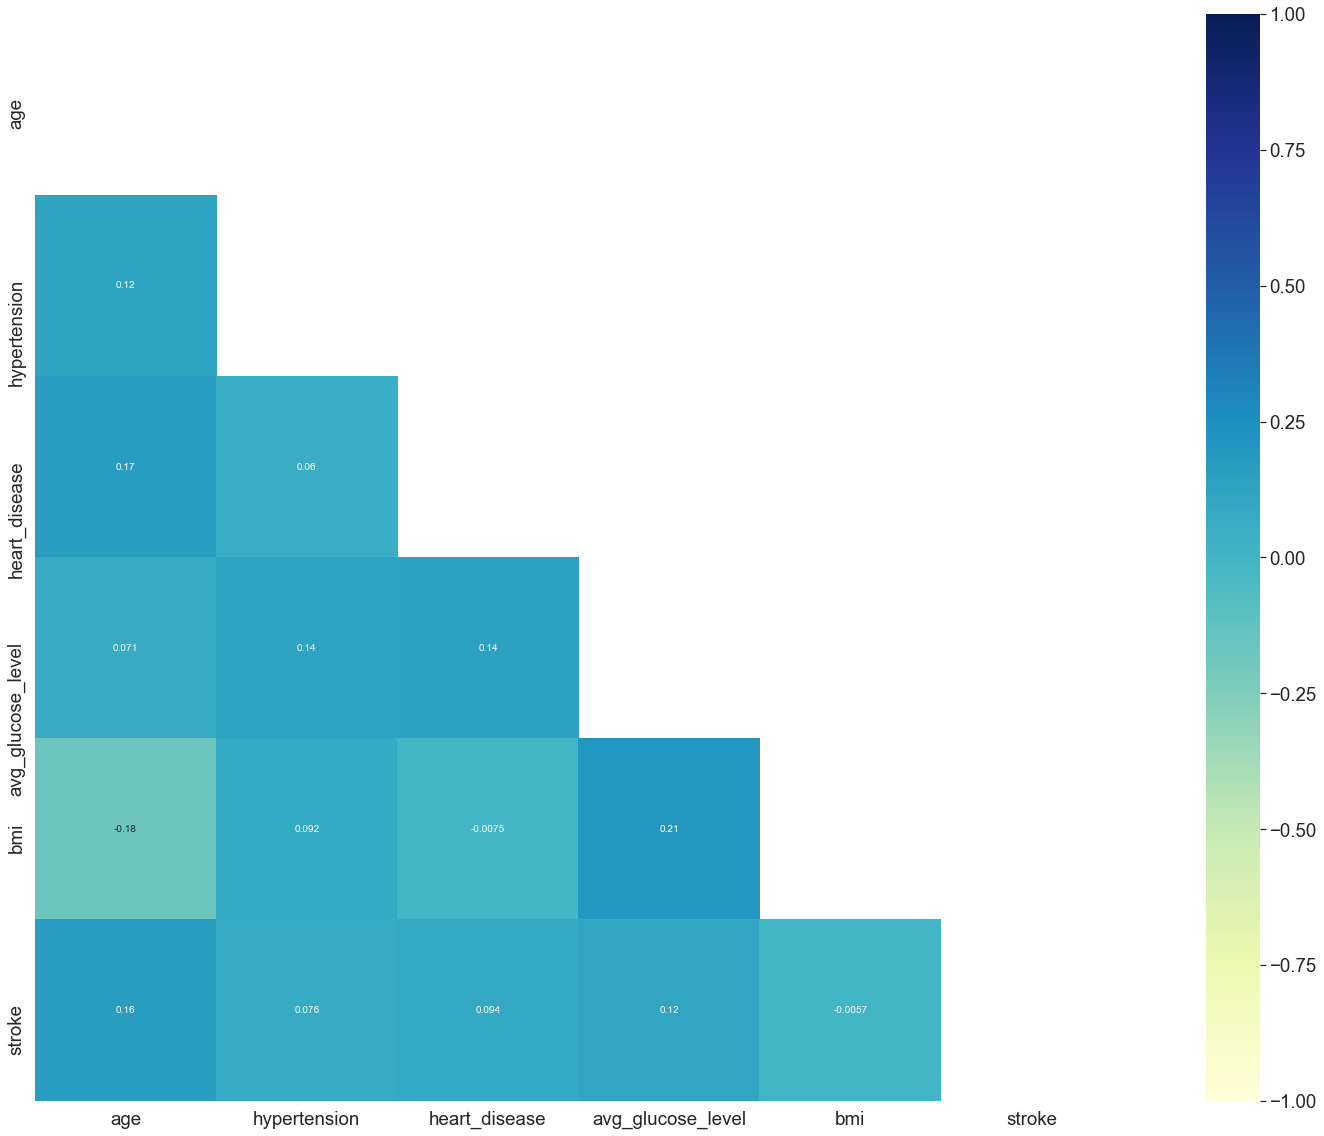

In [83]:
corr_matrix = data.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30,20))
    sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="YlGnBu", annot=True, mask=mask, square=True)

<AxesSubplot:xlabel='stroke', ylabel='count'>

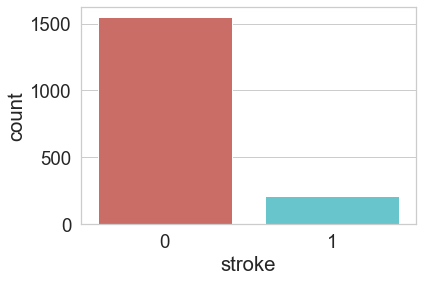

In [84]:
sns.countplot(x='stroke', data=data, palette='hls') #имеем сильно неравное распределение по классам

In [85]:
count_0 = len(data[data['stroke']==0])
count_1 = len(data[data['stroke']==1])
pct_of_0 = count_0 / (count_0+count_1)
print("Есть заболевание: ", pct_of_0*100)
pct_of_1 = count_1/(count_0+count_1)
print("Нет заболевания: ", pct_of_1*100)

Есть заболевание:  87.94769755542922
Нет заболевания:  12.052302444570778


# X и y

In [86]:
X = data.drop('stroke', axis = 1) # выбрасываем столбец 'class'
y = data['stroke']
feature_names = X.columns

In [87]:
feature_names

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

In [88]:
X = X.to_numpy()
y = np.array(y)

In [89]:
print(X.shape)
print(y.shape)
N, d = X.shape

(1759, 10)
(1759,)


In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 777)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

print(N_train, N_test)

1231 528


# Random Forest

In [91]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

1.0

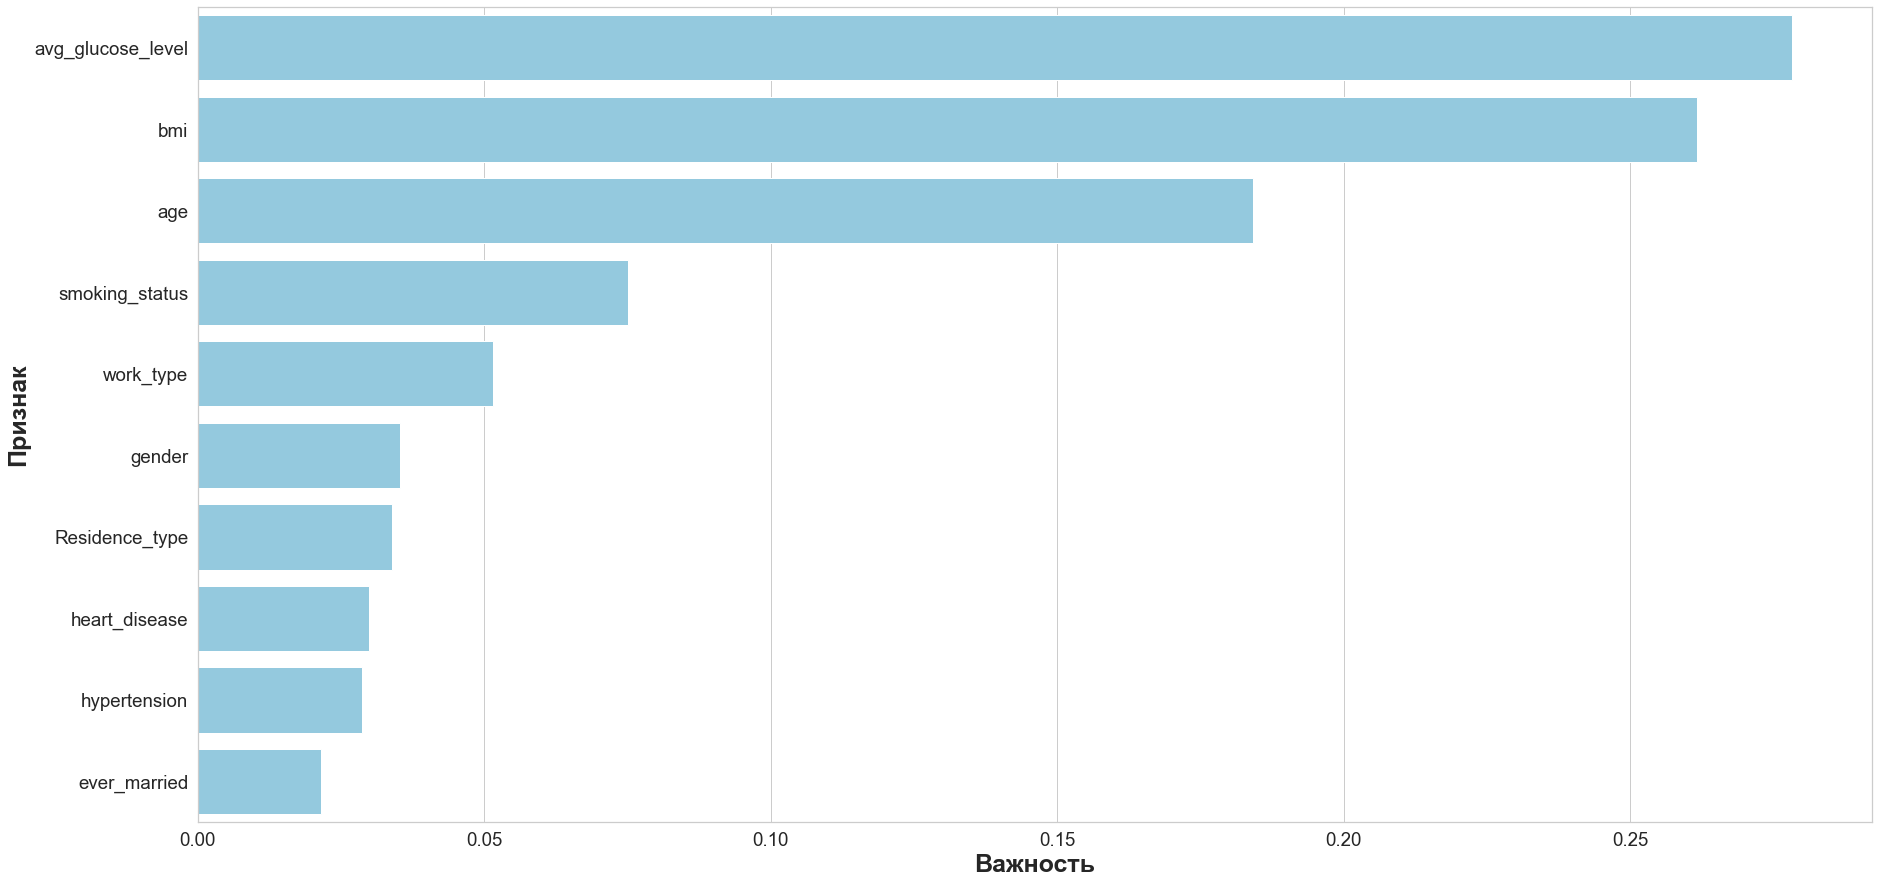

None

,Признак,Процент важности
0,avg_glucose_level,0.278219
1,bmi,0.261638
2,age,0.184087
3,smoking_status,0.075099
4,work_type,0.051557
5,gender,0.035311
6,Residence_type,0.033916
7,heart_disease,0.029949
8,hypertension,0.028702
9,ever_married,0.021521


In [97]:
feats = {}
for feature, importance in zip(data.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Процент важности'})
importances = importances.sort_values(by='Процент важности', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Признак'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Процент важности'], y=importances['Признак'], data=importances, color='skyblue')
plt.xlabel('Важность', fontsize=25, weight = 'bold')
plt.ylabel('Признак', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

# Заметим, что наиболее важными признаками для классификации оказались: уровень сахара в крови, индекс массы тела и возраст

Оценим результаты

In [98]:
error_train = np.mean(y_train != rfc.predict(X_train))
error_test  = np.mean(y_test  != rfc.predict(X_test))
print('Error on train = ', error_train)
print('Error on test = ', error_test)

Error on train =  0.0
Error on test =  0.13446969696969696


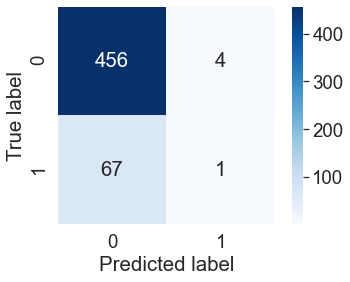

In [99]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

# Logistic Regression

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
LogReg = LogisticRegression(max_iter=400)

In [102]:
LogReg.fit(X_train, y_train)

LogisticRegression(max_iter=400)

Оценим результаты

In [103]:
error_train = np.mean(y_train != LogReg.predict(X_train))
error_test  = np.mean(y_test  != LogReg.predict(X_test))
print('Error on train = ', error_train)
print('Error on test = ', error_test)

Error on train =  0.11779041429731925
Error on test =  0.12878787878787878


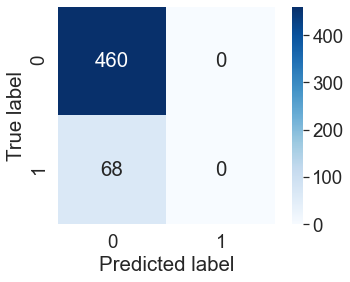

In [104]:
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, LogReg.predict(X_test)), square=True, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted label")
plt.ylabel("True label")
pass

# Нейронная сеть с подбором параметров

In [105]:
from sklearn.neural_network import MLPClassifier
alpha_arr = np.logspace(-4, 15, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(hidden_layer_sizes = (7, 7), max_iter=701, random_state = 42, alpha = alpha)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

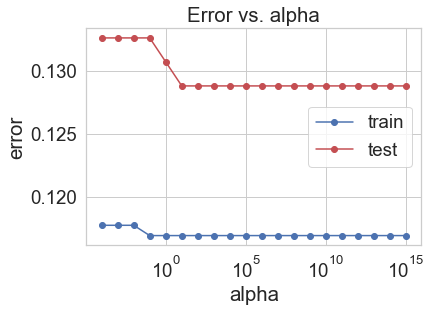

In [106]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [107]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.11697806661251016 0.12878787878787878
